In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 782 images belonging to 5 classes.


In [4]:
train_generator.class_indices

{'Brown Spot': 0,
 'Healthy Leaf': 1,
 'Leaf Blast': 2,
 'Leaf Blight': 3,
 'Leaf Smut': 4}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Brown Spot', 'Healthy Leaf', 'Leaf Blast', 'Leaf Blight', 'Leaf Smut']

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.92549026 0.94117653 0.9843138 ]
  [0.92549026 0.94117653 0.9843138 ]
  [0.92549026 0.94117653 0.9843138 ]
  ...
  [0.6929647  0.77451026 0.37647063]
  [0.7503245  0.7999986  0.5921498 ]
  [0.9141329  0.9390088  0.88281757]]

 [[0.9265361  0.94222236 0.98535967]
  [0.9262895  0.9419758  0.985113  ]
  [0.926043   0.94172925 0.9848665 ]
  ...
  [0.6895128  0.7703187  0.37647063]
  [0.75648856 0.8036971  0.6106421 ]
  [0.92596793 0.949611   0.90106326]]

 [[0.9294118  0.9450981  0.98823535]
  [0.9294118  0.9450981  0.98823535]
  [0.9294118  0.9450981  0.98823535]
  ...
  [0.68606085 0.7661271  0.37647063]
  [0.76265264 0.8073955  0.62913436]
  [0.93780303 0.9602132  0.919309  ]]

 ...

 [[0.4128697  0.46440703 0.11876092]
  [0.2095013  0.2190026  0.0269508 ]
  [0.2354117  0.25174978 0.02070848]
  ...
  [0.37569052 0.36283588 0.16207722]
  [0.36114323 0.3477955  0.15024216]
  [0.34659597 0.33275512 0.13840708]]

 [[0.3978293  0.4461613  0.11235026]
  [0.21024099 0.22048199 0.02497829]


In [6]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 121 images belonging to 5 classes.


In [7]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 212 images belonging to 5 classes.


In [8]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6890463  0.6890463  0.6890463 ]
  [0.6791969  0.6791969  0.6791969 ]
  [0.68474567 0.68474567 0.68474567]
  ...
  [0.77382535 0.7777469  0.7581391 ]
  [0.77414536 0.77806693 0.7584591 ]
  [0.7744654  0.77838695 0.7587791 ]]

 [[0.68923837 0.68923837 0.68923837]
  [0.67906886 0.67906886 0.67906886]
  [0.6850017  0.6850017  0.6850017 ]
  ...
  [0.790119   0.79404056 0.7744327 ]
  [0.789607   0.79352856 0.7739207 ]
  [0.78909504 0.7930166  0.7734088 ]]

 [[0.6894303  0.6894303  0.6894303 ]
  [0.6789409  0.6789409  0.6789409 ]
  [0.6852577  0.6852577  0.6852577 ]
  ...
  [0.76205546 0.765977   0.7463692 ]
  [0.7623755  0.76629704 0.7466892 ]
  [0.76269543 0.766617   0.74700916]]

 ...

 [[0.73409784 0.68703896 0.68703896]
  [0.7339698  0.686911   0.686911  ]
  [0.73384184 0.686783   0.686783  ]
  ...
  [0.8190994  0.7838053  0.79557   ]
  [0.8196079  0.7843138  0.7960785 ]
  [0.8196079  0.7843138  0.7960785 ]]

 [[0.7191781  0.67211926 0.67211926]
  [0.7189221  0.67186326 0.67186326]


In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 5

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,  # Total training steps per epoch
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,  # Total validation steps
    verbose=1,
    epochs=20,
)



Epoch 1/20
24/24 [==============================] - 73s 3s/step - loss: 1.4385 - accuracy: 0.4507 - val_loss: 1.5410 - val_accuracy: 0.4375
Epoch 2/20
24/24 [==============================] - 69s 3s/step - loss: 1.3648 - accuracy: 0.4493 - val_loss: 1.2755 - val_accuracy: 0.4479
Epoch 3/20
24/24 [==============================] - 70s 3s/step - loss: 1.2254 - accuracy: 0.4800 - val_loss: 1.1765 - val_accuracy: 0.4792
Epoch 4/20
24/24 [==============================] - 70s 3s/step - loss: 1.1720 - accuracy: 0.5080 - val_loss: 1.2062 - val_accuracy: 0.4375
Epoch 5/20
24/24 [==============================] - 69s 3s/step - loss: 1.1332 - accuracy: 0.5187 - val_loss: 1.1753 - val_accuracy: 0.4479
Epoch 6/20
24/24 [==============================] - 72s 3s/step - loss: 1.1232 - accuracy: 0.5213 - val_loss: 1.1180 - val_accuracy: 0.4896
Epoch 7/20
24/24 [==============================] - 75s 3s/step - loss: 1.0600 - accuracy: 0.5493 - val_loss: 1.0641 - val_accuracy: 0.5208
Epoch 8/20
24/24 [==

In [18]:
scores = model.evaluate(test_generator)
scores

7/7 [==============================] - 15s 2s/step - loss: 0.6109 - accuracy: 0.7453


[0.6109458804130554, 0.7452830076217651]

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

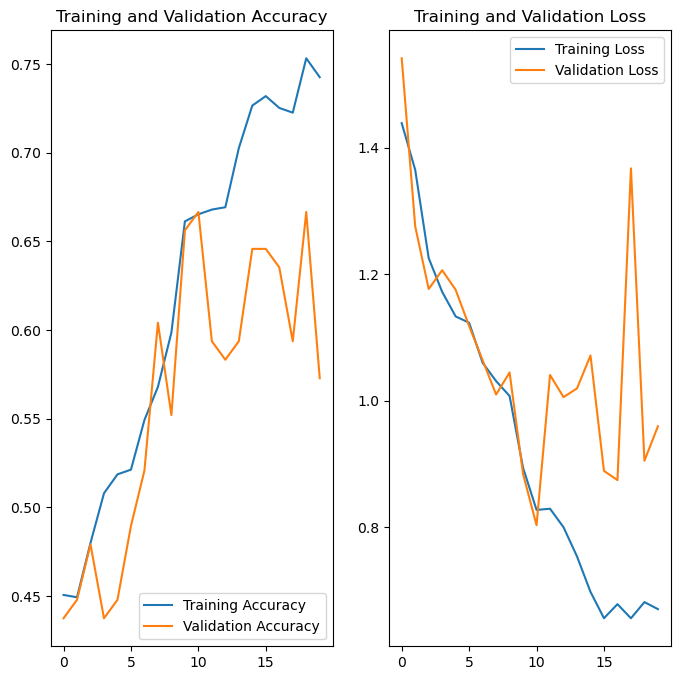

In [22]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Leaf Smut
1/1 [==============================] - 0s 498ms/step
predicted label: Leaf Smut


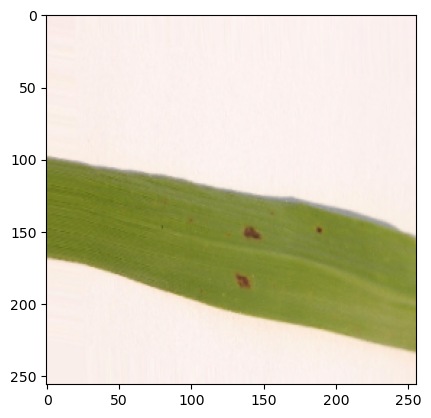

In [25]:
import numpy as np


for images_batch, labels_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [26]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 38ms/step


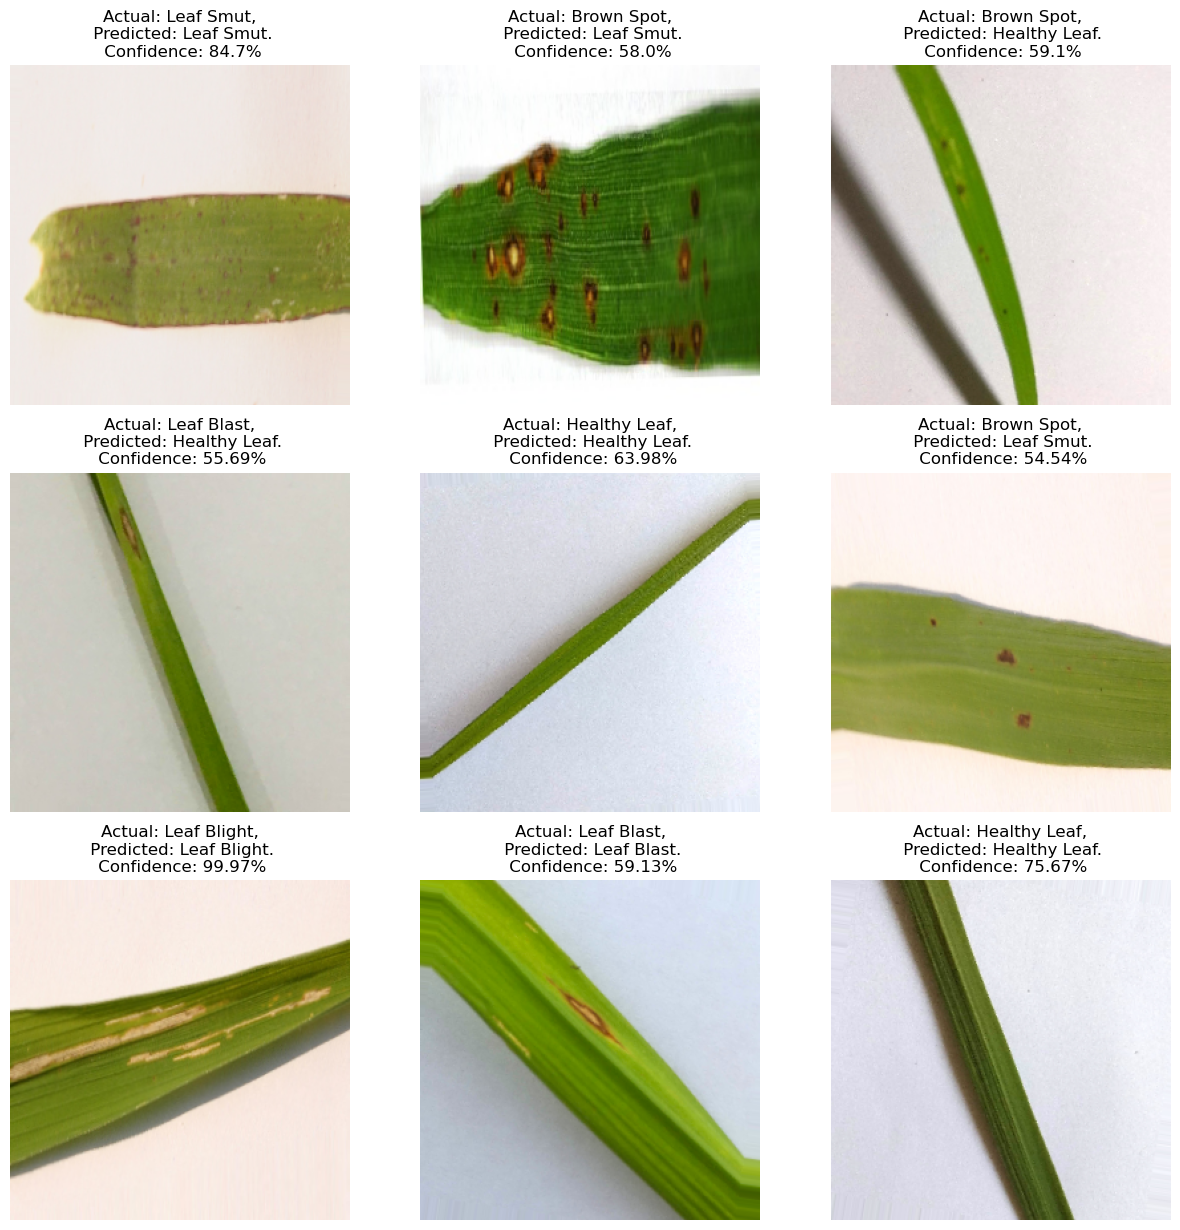

In [27]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [30]:
model.save("potatoes.h5")